# AirBnb Listing Analysis

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

In [2]:
# Importing the "Listings" data file
data = pd.read_csv('Listings.csv', low_memory = False)

## Data Profiling

#### Dataset Size

In [4]:
data.shape

(279712, 33)

<font color='blue'> The dataset has 279,712 AirBnb listings and each listing contains 33 details of specific attribute/features 

#### Viewing the top 5 rows in the dataset

In [3]:
data.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃ‚Â² Paris (Sacre CÃ…â€œur),10328771,11/29/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


#### Analyzing the datatype of each feature

In [5]:
data.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

#### Converting data type

In [6]:
data['host_since'] = pd.to_datetime(data['host_since'])

<font color='blue'> Converted the host_since column from string to datetime format using pd.to_datetime() to facilitate the analysis of time series data

## Filtering the dataset

#### Obtaining the listings in Paris

In [7]:
sub_data = data[data['city'] == 'Paris']

#### Obtaining specific attributes of the Airbnb - Key factors contributing to analysis

In [9]:
sub_data = sub_data[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [10]:
sub_data.shape

(64690, 5)

In [11]:
sub_data.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


## Exploring Data Analysis and Visualization

#### Checking and handling missing values

In [44]:
# Checking for missing_values
sub_data.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
host_year        33
dtype: int64

In [46]:
sub_data_cleaned = sub_data.dropna(subset=['host_year', 'host_since'])

In [47]:
sub_data_cleaned.isnull().sum()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
host_year        0
dtype: int64

#### Descriptive Statistics

In [49]:
# Obtaining summary statistics
sub_data_cleaned[['accommodates', 'price']].describe()

,accommodates,price
count,64657.000000,64657.000000
mean,3.037877,113.104614
std,1.588382,214.479626
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


<font color = 'blue'> It is evident that the average Airbnb listing in Paris accommodates around 3 guests, with prices varying significantly, ranging from €0 to €12,000 per night, reflecting diverse pricing strategies among hosts.

### Aggregating Paris Listings by Neighbourhood

In [51]:
# Group by 'neighbourhood' and calculate mean price
paris_listings_neighbourhood = sub_data.groupby('neighbourhood')['price'].mean().reset_index()

# Sort by mean price (low to high)
paris_listings_neighbourhood = paris_listings_neighbourhood.sort_values(by='price')

paris_listings_neighbourhood

,neighbourhood,price
10,Menilmontant,74.942257
2,Buttes-Chaumont,82.690182
3,Buttes-Montmartre,87.209479
17,Reuilly,89.058402
16,Popincourt,90.559459
6,Gobelins,98.110184
11,Observatoire,101.866801
0,Batignolles-Monceau,102.612702
5,Enclos-St-Laurent,102.967156
19,Vaugirard,106.831330


<font color = 'blue'> Neighborhoods like Menilmontant and Buttes-Chaumont have relatively lower average prices, while neighborhoods such as Louvre and Elysee command higher average prices, likely due to their central locations and proximity to major attractions. Understanding these price variations can help in strategizing pricing and marketing approaches for Airbnb hosts in Paris.

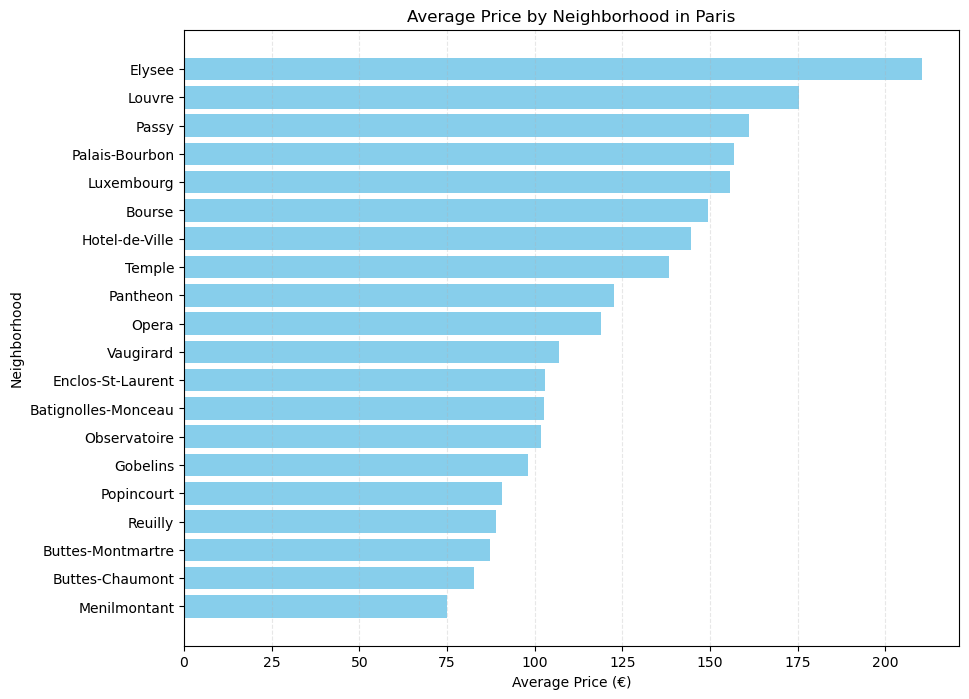

In [52]:
# Plotting
plt.figure(figsize=(10, 8))
plt.barh(paris_listings_neighbourhood['neighbourhood'], paris_listings_neighbourhood['price'], color='skyblue')
plt.xlabel('Average Price (€)')
plt.ylabel('Neighborhood')
plt.title('Average Price by Neighborhood in Paris')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Show plot
plt.show()

### Aggregating Paris Listings by Accomodations

In [16]:
# Identify the most expensive neighborhood
most_expensive_neighbourhood = sub_data.groupby('neighbourhood')['price'].mean().idxmax()

# Filter data for the most expensive neighborhood
filtered_df = sub_data[sub_data['neighbourhood'] == most_expensive_neighbourhood]

# Group by 'accommodates' and calculate the mean price
paris_listings_accommodations = filtered_df.groupby('accommodates')['price'].mean().reset_index()

# Sort by mean price (low to high)
paris_listings_accommodations = paris_listings_accommodations.sort_values(by='price')

paris_listings_accommodations

,accommodates,price
0,0,0.000000
1,1,79.522222
3,3,152.828767
2,2,155.103352
4,4,212.096070
5,5,328.817073
6,6,355.508571
8,8,405.518519
7,7,411.538462
9,9,440.272727


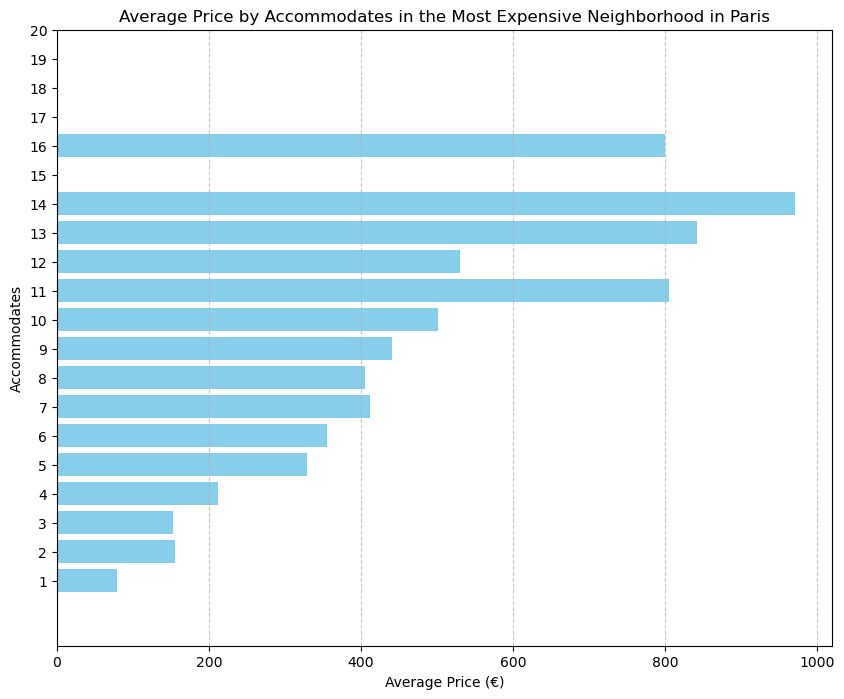

In [53]:
# Plotting
plt.figure(figsize=(10, 8))
plt.barh(paris_listings_accommodations['accommodates'], paris_listings_accommodations['price'], color='skyblue')
plt.xlabel('Average Price (€)')
plt.ylabel('Accommodates')
plt.title('Average Price by Accommodates in the Most Expensive Neighborhood in Paris')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Setting specific values on the y-axis
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])  # Add more values as needed

# Show plot
plt.show()

<font color = 'blue'> The data provided shows the average prices for Airbnb listings increase steadily with an increasing number of guests, reflecting higher accommodation costs for larger groups. This trend underscores the influence of capacity on pricing decisions for Airbnb hosts, catering to various group sizes and preferences in the Parisian market.

### Time Series Analysis of Price and Host Count

In [17]:
# Extract year from 'host_since'
sub_data['host_year'] = sub_data['host_since'].dt.year

# Group by 'host_year' and calculate the average price and count of new hosts
paris_listings_over_time = sub_data.groupby('host_year').agg(avg_price=('price', 'mean'),
                                                             new_hosts=('host_year', 'count')).reset_index()

paris_listings_over_time

,host_year,avg_price,new_hosts
0,2008.0,77.750000,4
1,2009.0,159.641509,106
2,2010.0,125.031250,416
3,2011.0,124.828230,1339
4,2012.0,111.578615,4592
5,2013.0,107.096414,8142
6,2014.0,100.253800,10922
7,2015.0,103.646250,12147
8,2016.0,114.159847,8871
9,2017.0,108.658888,4585


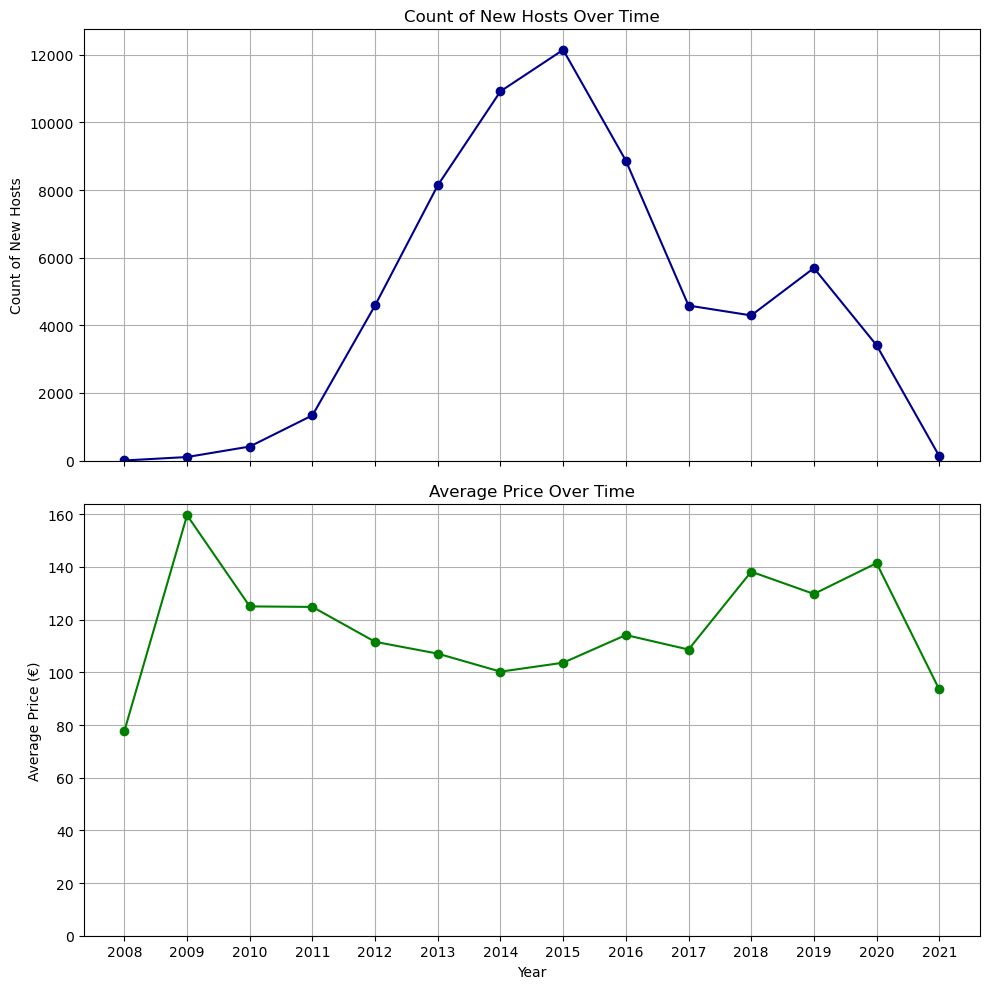

In [36]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Line chart for count of new hosts over time
ax[0].plot(paris_listings_over_time['host_year'], paris_listings_over_time['new_hosts'], marker='o', linestyle='-', color='darkblue')
ax[0].set_ylabel('Count of New Hosts')
ax[0].set_ylim(0)
ax[0].set_title('Count of New Hosts Over Time')
ax[0].grid(True)

# Line chart for average price over time
ax[1].plot(paris_listings_over_time['host_year'], paris_listings_over_time['avg_price'], marker='o', linestyle='-', color='green')
ax[1].set_ylabel('Average Price (€)')
ax[1].set_ylim(0)
ax[1].set_title('Average Price Over Time')
ax[1].grid(True)

# Set X-axis label for the whole plot
plt.xlabel('Year')

# Set X-axis ticks based on the host_year values
ax[1].set_xticks(paris_listings_over_time['host_year'])

plt.tight_layout()
plt.show()

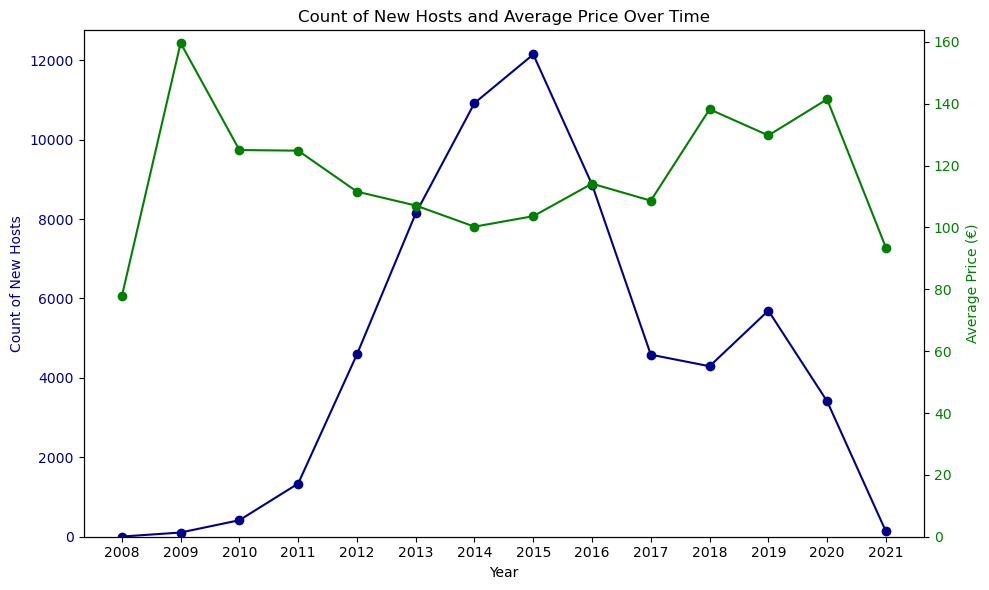

In [37]:
# Plotting with dual axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line chart for count of new hosts over time
ax1.plot(paris_listings_over_time['host_year'], paris_listings_over_time['new_hosts'], marker='o', linestyle='-', color='darkblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of New Hosts', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax1.set_ylim(0)
ax1.set_title('Count of New Hosts and Average Price Over Time')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Line chart for average price over time on secondary y-axis
ax2.plot(paris_listings_over_time['host_year'], paris_listings_over_time['avg_price'], marker='o', linestyle='-', color='green')
ax2.set_ylabel('Average Price (€)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0)

# Set X-axis ticks based on the host_year values
ax1.set_xticks(paris_listings_over_time['host_year'])

plt.tight_layout()
plt.show()


<font color = 'blue'> The above plot clearly indicates the following:
    
<font color = 'blue'> - The average price of Airbnb listings in Paris fluctuated over the years, peaking in 2009 at €159.64 per night and stabilizing around €100-140 per night in recent years (2016-2020). The drop to €93.49 in 2021 suggests potential market adjustments or external factors affecting pricing dynamics.

<font color = 'blue'> - The number of new hosts followed a similar trajectory, reaching its peak in 2015 with 12,147 new hosts. Subsequent years saw a decline, with fluctuations indicating shifts in market participation or regulatory impacts affecting host entry into the market.

## Conclusion

In conclusion, the analysis eveals a market characterized by varying pricing trends and host dynamics over the years. Prices have shown fluctuations, peaking in earlier years and stabilizing more recently, suggesting adaptation to market forces and regulatory influences. The number of new hosts peaked in 2015 but has since shown a decline, reflecting potential market saturation or regulatory impacts on host participation. These findings underscore the dynamic nature of the Parisian Airbnb market, influenced by economic conditions, regulatory changes, and evolving consumer preferences.